
## long-vs-wide-data

A dataset can be written in two different formats: wide and long.

A wide format contains values that `do not repeat` in the first column.

A long format contains values that `do repeat` in the first column.

This is a long format:

|Product | Attribute | Value |
|--------|-----------|-------|
A | Height | 10
A | Width | 5
A | Weight | 2
B | Height | 20
B | Width | 10

The same data is a wide format would be:

|Product | Height | Width | Weight|
|--------|--------|-------|-------|
A | 10 | 5 | 2
B | 20 | 10 | NA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crop = pd.read_excel('Somalia crop production_FSNAU.xlsx')

In [3]:
crop.head()

,Country,Zone,Region,District,Year,Crop,Livelihood_System,Season,Production
0,Somalia,Central,Shabelle Dhexe,Jowhar,2021,Sesame,Agro Pastoral,2. Deyr,1.0
1,Somalia,Central,Shabelle Dhexe,Balcad,2021,Sorghum,Agro Pastoral,2. Deyr,20.0
2,Somalia,South,Shabelle Hoose,Afgooye,2021,Sorghum,Agro Pastoral,2. Deyr,1600.0
3,Somalia,South,Shabelle Hoose,Afgooye,2021,Sesame,Agro Pastoral,2. Deyr,200.0
4,Somalia,South,Shabelle Hoose,Baraawe,2021,Maize,Agro Pastoral,2. Deyr,120.0


Creating Pivot tables with Pandas.

index = column to groupby on the row axis

columns = column to groupby on the columns axis

values = column to aggregate

aggfunc = type of aggreagation function to use by defualt np.mean is used, for summation use np.sum

margins = Adds subtotal/grandtotal rows and columns: takes True or False values.

margins_names = Name of the row / column that will contain the totals when margins is True


pd.options.display.float_format = '{:.2f}'.format

In [4]:
pivot = crop.pivot_table(index = "Year", columns = "Season", values = "Production",aggfunc = np.sum, margins = True, margins_name = 'Grand Total')

In [5]:
pivot.round(2)

Season,1. Gu,2. Deyr,Grand Total
Year,,,
1995,151284.63,104505.73,255790.35
1996,202766.07,46812.20,249578.27
1997,217353.09,60532.05,277885.14
1998,106053.38,92150.71,198204.09
1999,128883.00,130001.00,258884.00
2000,212307.00,109927.00,322234.00
2001,115394.50,148276.00,263670.50
2002,208929.00,181182.00,390111.00
2003,156305.90,129188.00,285493.90


Create another Pivot table without grand totals for plotting

In [6]:
pivot2 = crop.pivot_table(index = "Year", columns = "Season", values = "Production",aggfunc = np.sum)

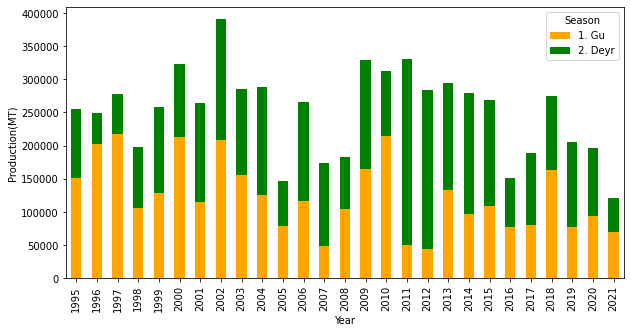

In [7]:
pivot2.plot(kind = 'bar', stacked = True, color = ['orange', 'green'], figsize = (10, 5), ylabel = 'Production(MT)')
plt.show()